In [34]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px


# Time Series and Stats Libraries
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Warnings
import warnings
warnings.filterwarnings('ignore')  # To ignore unnecessary warnings

# Jupyter Notebook settings
%matplotlib inline
sns.set_style('whitegrid')


In [19]:
# Load the data
df = pd.read_csv('MSFT_1986-03-13_2025-02-04.csv')

# Show first few rows
df.head()


Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059827  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.061963   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063032   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061429    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060361    47894400

In [20]:
# Check for missing values and info
df.info()
print(df.isnull().sum())

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Confirm changes
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9800 non-null   object 
 1   Open       9800 non-null   float64
 2   High       9800 non-null   float64
 3   Low        9800 non-null   float64
 4   Close      9800 non-null   float64
 5   Adj Close  9800 non-null   float64
 6   Volume     9800 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 536.1+ KB
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059827  1031788800
1986-03-14  0.097222  0.102431  0.097222  0.100694   0.061963   308160000
1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063032   133171200
1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061429    67766400
1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060361    47894400

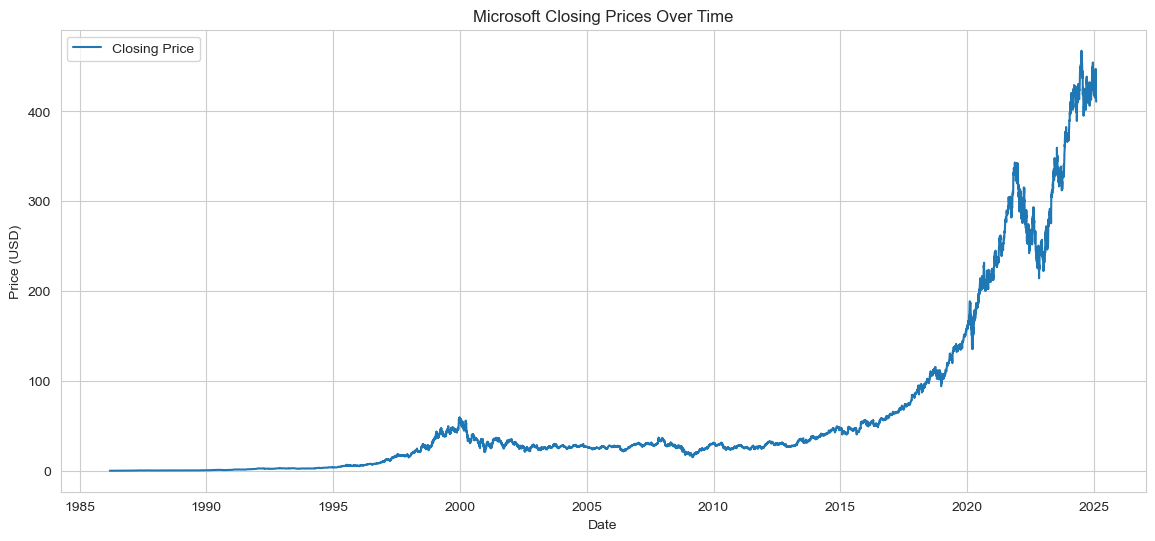

In [21]:
# Plot Closing Prices
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Microsoft Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


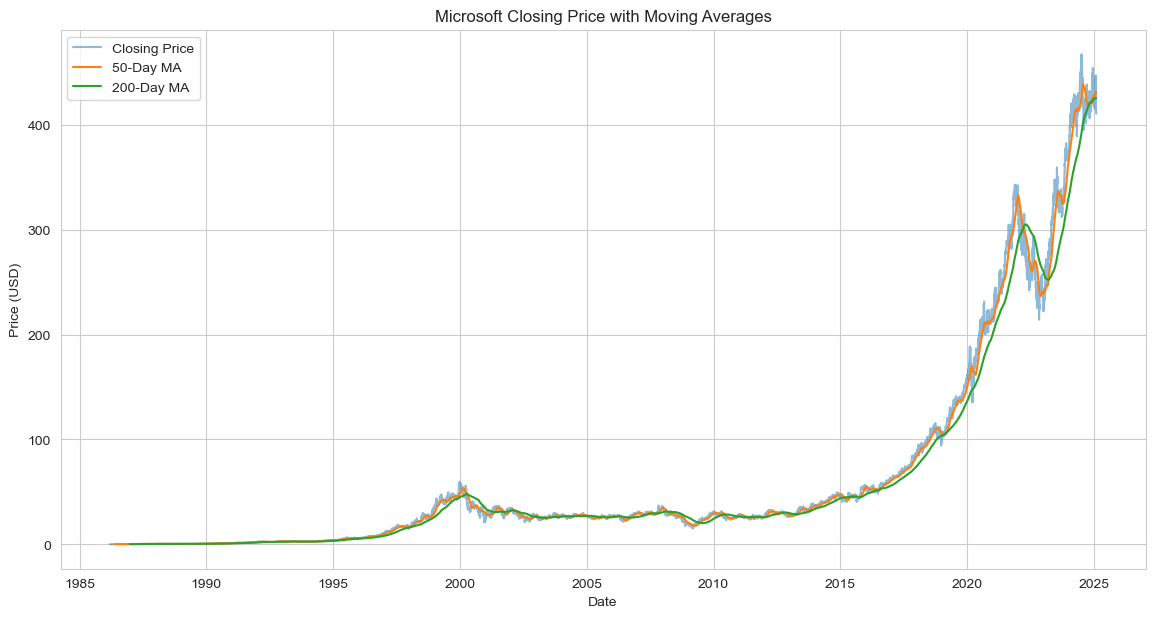

In [22]:
# Create Moving Averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot Closing Price + Moving Averages
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Closing Price', alpha=0.5)
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('Microsoft Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


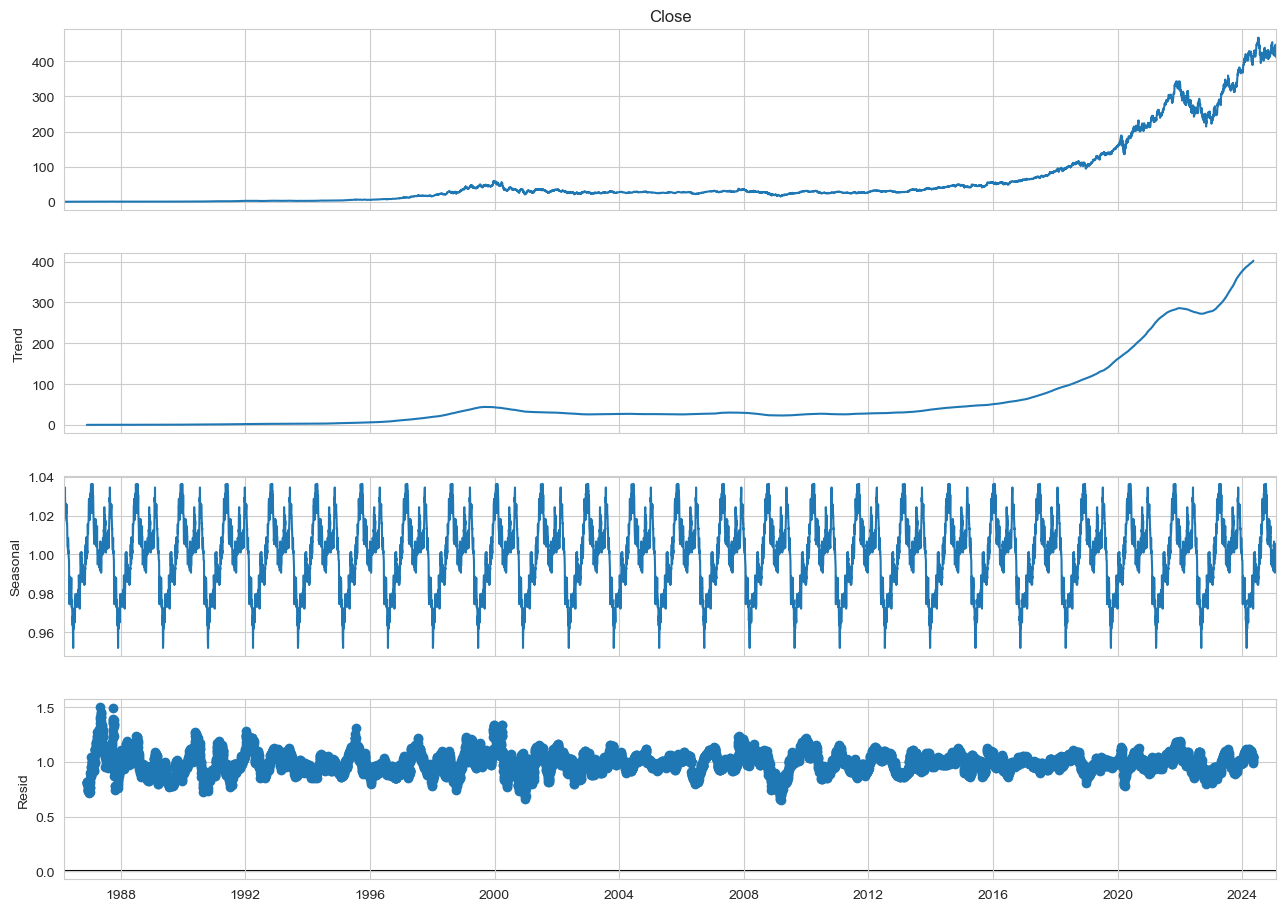

In [23]:
# Decompose the time series (using a yearly period of 365 days)
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='multiplicative', period=365)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()


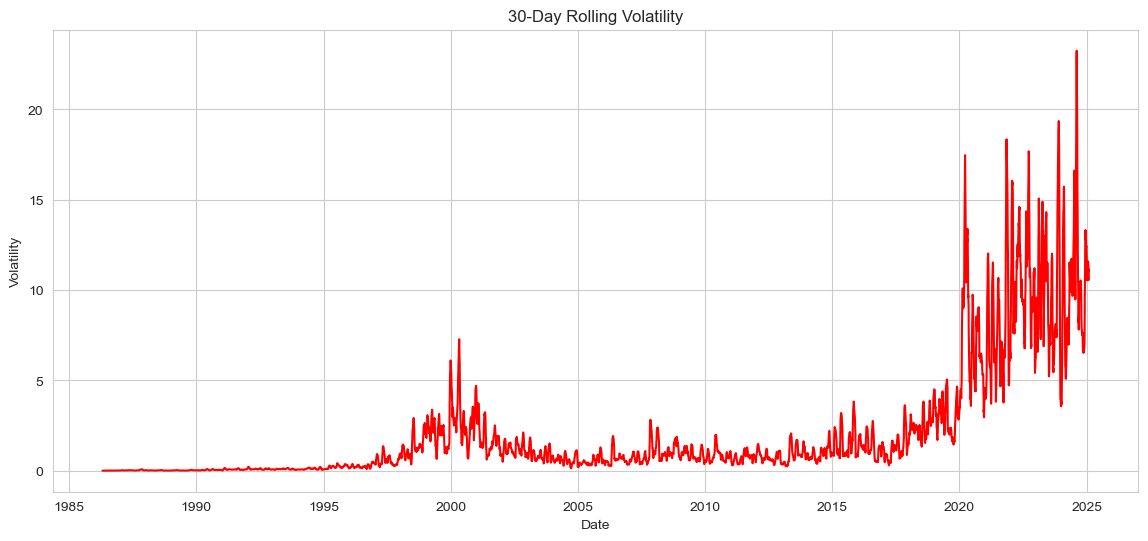

In [24]:
# Calculate 30-day rolling volatility (standard deviation of closing prices)
df['Volatility'] = df['Close'].rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(14,6))
plt.plot(df['Volatility'], color='red')
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


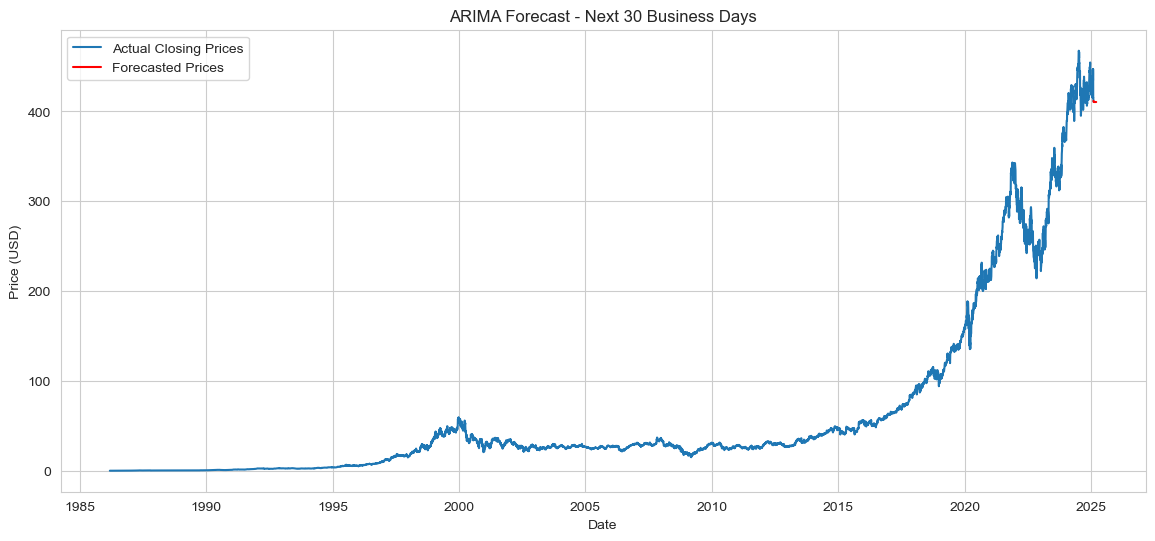

In [25]:
# Build ARIMA model (order can be tuned for better results)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(5,1,0))
model_fit = model.fit()

# Forecast next 30 business days
forecast_steps = 30
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='B')
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual prices and forecast
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Actual Closing Prices')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='red')
plt.title('ARIMA Forecast - Next 30 Business Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


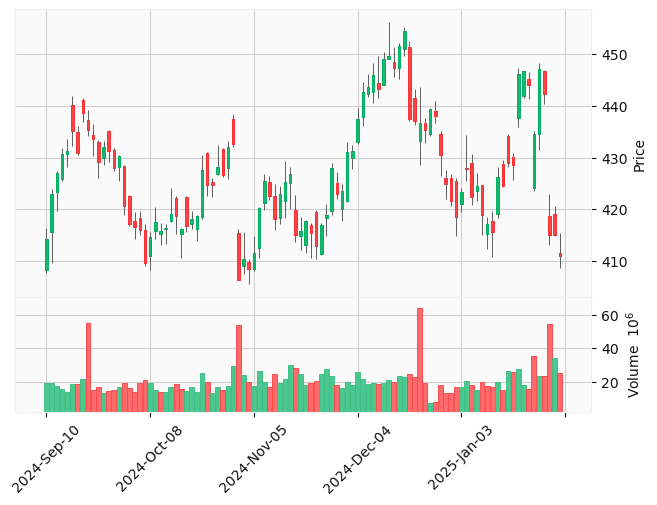

In [29]:
# Candlestick chart using mplfinance (last 100 days for clarity)

import mplfinance as mpf


mpf.plot(df[-100:], type='candle', volume=True, style='yahoo')


In [33]:
# Interactive Closing Price chart
fig = px.line(df, x=df.index, y='Close', title='Microsoft Stock Closing Prices (Interactive)')
fig.update_layout(xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

# Interactive Moving Averages chart
fig_ma = go.Figure()
fig_ma.add_trace(go.Scatter(x=df.index, y=df['Close'], name='Closing Price'))
fig_ma.add_trace(go.Scatter(x=df.index, y=df['MA50'], name='50-Day MA'))
fig_ma.add_trace(go.Scatter(x=df.index, y=df['MA200'], name='200-Day MA'))
fig_ma.update_layout(title='Closing Price with Moving Averages (Interactive)', xaxis_title='Date', yaxis_title='Price (USD)')
fig_ma.show()


